Title: A prediction of the presence of heart disease using age, maximum heart rate variables in patients in Cleveland and Switzerland using the Heart Disease dataset

Introduction:

In recent years, numerous studies have been conducted to evaluate the variables that might contribute to increasing the risk of heart disease in humans. Some variables that were studied before include high cholesterol levels which can create clots in the blood vessels, high blood pressure that can cause heart attacks, attenuated exercise heart rate, higher than 2mm ST wave depression after exercise that indicates ischemia, and other factors like age (1). The Heart Disease dataset (2) provides sets of information on heart disease data collection done in Cleveland, Hungary, Switzerland and the VA Long Beach. The study aimed to explore the relationships between 14 different attributed variables and the presence of heart disease. Using this dataset, we aim to predict the diagnosis of heart disease with a computerized model using an R system based on age, serum cholesterol levels, resting blood pressure, ST wave depression induced by exercise, and maximum heart rate in patients in Cleveland, Hungary, Switzerland and the VA Long Beach. We will also evaluate whether or not the chosen predictor variables are efficient in the final predictive model.

Methods:

First, we uploaded the dataset into our public GitHub repository and downloaded it into this R notebook through the GitHub link. After loading the tidyverse, repr, and tidymodels libraries, we read files from Cleveland, Switzerland, Hungary, and VA Long Beach to achieve the maximum amount of data as well as a more defined visual impact for our plots. Out of the 14 variables, we first considered age (in years), resting blood pressure (on admission to the hospital in mmHg), serum cholesterol (mg/dl), maximum heart rate (bpm post-exercise), ST wave depression (or old peak, induced by exercise relative to rest in mm) and diagnoses of heart disease.

We then cleaned and wrangled our initial data by selecting our chosen variables, creating the columns for our tibble, and removing any NA values from our dataset. We categorized the presence of heart disease by combining the different kinds of heart disease (values greater than one) as present, and values of zero as not present. We also used the as_factor function to alter the values in our categorical variable (presence of heart disease) into a factor to be used to classify our data (Table 1).

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))
switzerland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/switzerland.data", col_names = FALSE, na = c("?"))
hungary <- read_delim("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/hungarian.data", col_names = FALSE, na = c("?", "-9"))
long_beach <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/long_beach.data", col_names = FALSE, na = c("?"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = F

In [4]:
cleveland_select <- cleveland |>
    select(X1, X5, X4, X8, X10, X14)
switzerland_select <- switzerland |>
    select(X1, X5, X4, X8, X10, X14)
hungary_select <- hungary |>
    select(X1, X5, X4, X8, X10, X14)
long_beach_select <- long_beach |>
    select(X1, X5, X4, X8, X10, X14)

column_names <- c("age", "serum_cholesterol", "resting_blood_pressure", "max_heart_rate", "old_peak", "heart_disease_present")
colnames(cleveland_select) <- column_names
colnames(switzerland_select) <- column_names
colnames(hungary_select) <- column_names
colnames(long_beach_select) <- column_names


all_places <- rbind(cleveland_select, switzerland_select) |>
    rbind(hungary_select) |>
    rbind(long_beach_select)
all_places$heart_disease_present[all_places$heart_disease_present >= 1] <- "Yes"
all_places$heart_disease_present[all_places$heart_disease_present == 0] <- "No"
all_places$serum_cholesterol[all_places$serum_cholesterol == 0] <- NA
all_places$resting_blood_pressure[all_places$resting_blood_pressure == 0] <- NA
all_places_select <- mutate(all_places, heart_disease_present = as_factor(heart_disease_present))

all_places_cleaned <- all_places_select |>
    filter(max_heart_rate != "NA") |>
    filter(old_peak != "NA") |>
    filter(resting_blood_pressure != "NA")
print('Table 1: Cleaned data set') 
head(all_places_cleaned)

[1] "Table 1: Cleaned data set"


age,serum_cholesterol,resting_blood_pressure,max_heart_rate,old_peak,heart_disease_present
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,2.3,No
67,286,160,108,1.5,Yes
67,229,120,129,2.6,Yes
37,250,130,187,3.5,No
41,204,130,172,1.4,No
56,236,120,178,0.8,No


We split our dataset into training and testing data at a 75% split in order to fit our training data using the k-nearest neighbours classification. This allows us to then use our testing data to predict points utilizing pre-classified data to compare. Throughout the project, we also made sure to set.seed() every time we wanted to take random values.

In [5]:
set.seed(77777) 
places_split <- initial_split(all_places_cleaned, prop = 0.75, strata = heart_disease_present)
places_training <- training(places_split) 
places_testing <- testing(places_split) 

We then created a new table that took the mean averages of our numerical predictors, as well as the total counts of individuals that were diagnosed with heart disease and those that were not, to summarize some of the relevant data (Table 2).

In [6]:
avg <-  places_training |>
    select(-heart_disease_present) |>
    map_df(mean, na.rm = TRUE) |>
    mutate(serum_cholesterol_avg = serum_cholesterol, 
           resting_bp_avg = resting_blood_pressure,
           age_avg = age,
           max_heart_rate_avg = max_heart_rate,
           st_depression_avg = old_peak) |>
    select(serum_cholesterol_avg, resting_bp_avg, age_avg, max_heart_rate_avg, st_depression_avg)

count0 <- places_training |>
    filter(heart_disease_present == "No") |>
    count() |>
    pull()
count1 <- places_training |>
    filter(heart_disease_present == "Yes") |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_people_no_disease = count0) |>
    mutate(num_people_w_disease = count1)

print('Table 2: Summary table')
avg

[1] "Table 2: Summary table"


serum_cholesterol_avg,resting_bp_avg,age_avg,max_heart_rate_avg,st_depression_avg,num_people_no_disease,num_people_w_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
244.369,133.252,53.15649,138.2426,0.8723005,291,348


Using exclusively our training data, we created visualizations using scatter plots and coloured the points by heart disease to determine any relationships between the variables.

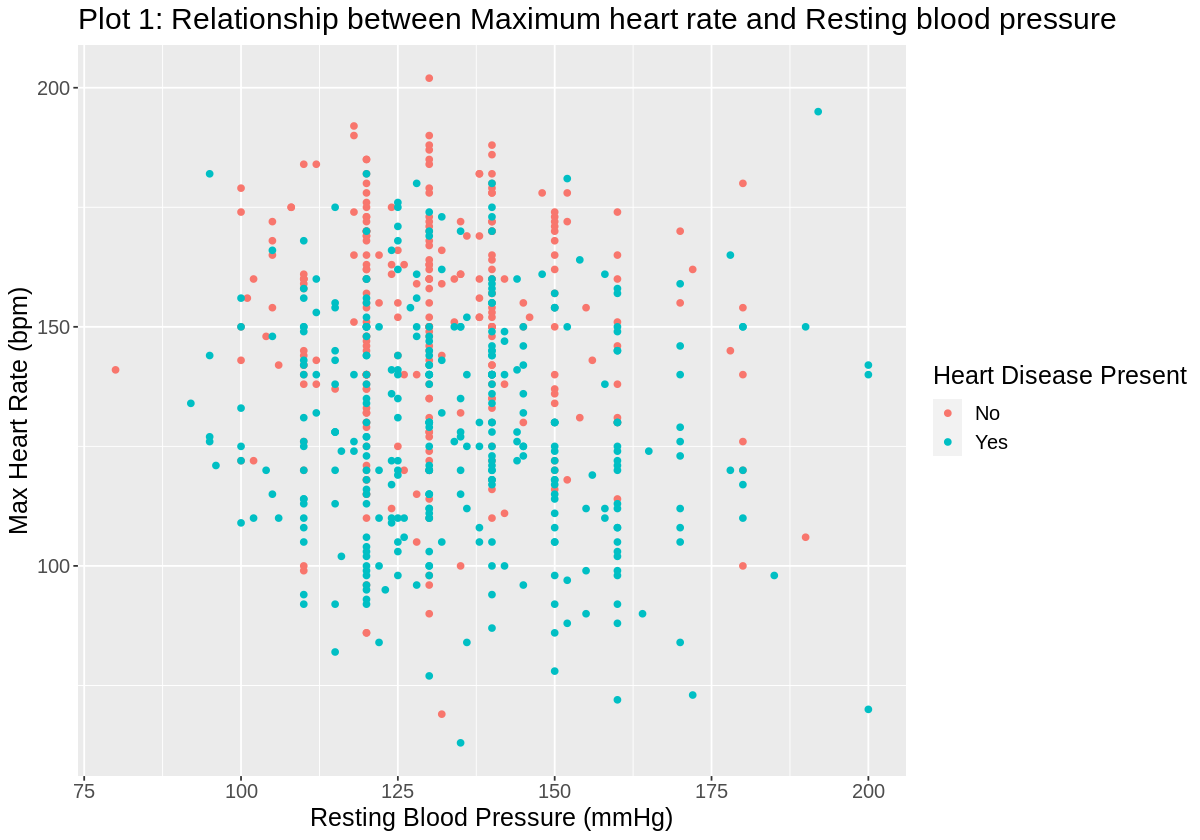

In [7]:
options(repr.plot.width = 10, repr.plot.height = 7)
distribution_plot <- ggplot(places_training, aes(x = resting_blood_pressure, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Max Heart Rate (bpm)") +
    labs(colour = "Heart Disease Present") +
     ggtitle('Plot 1: Relationship between Maximum heart rate and Resting blood pressure')+
    theme(text = element_text(size = 15))

distribution_plot

>Plot 1: This plot uses ggplot to visualize the relationship between maximum heart rate (bpm) and resting blood pressure (on admission to the hospital in mmHg) using a scatter-plot format while the points are colored by presence of heart disease.

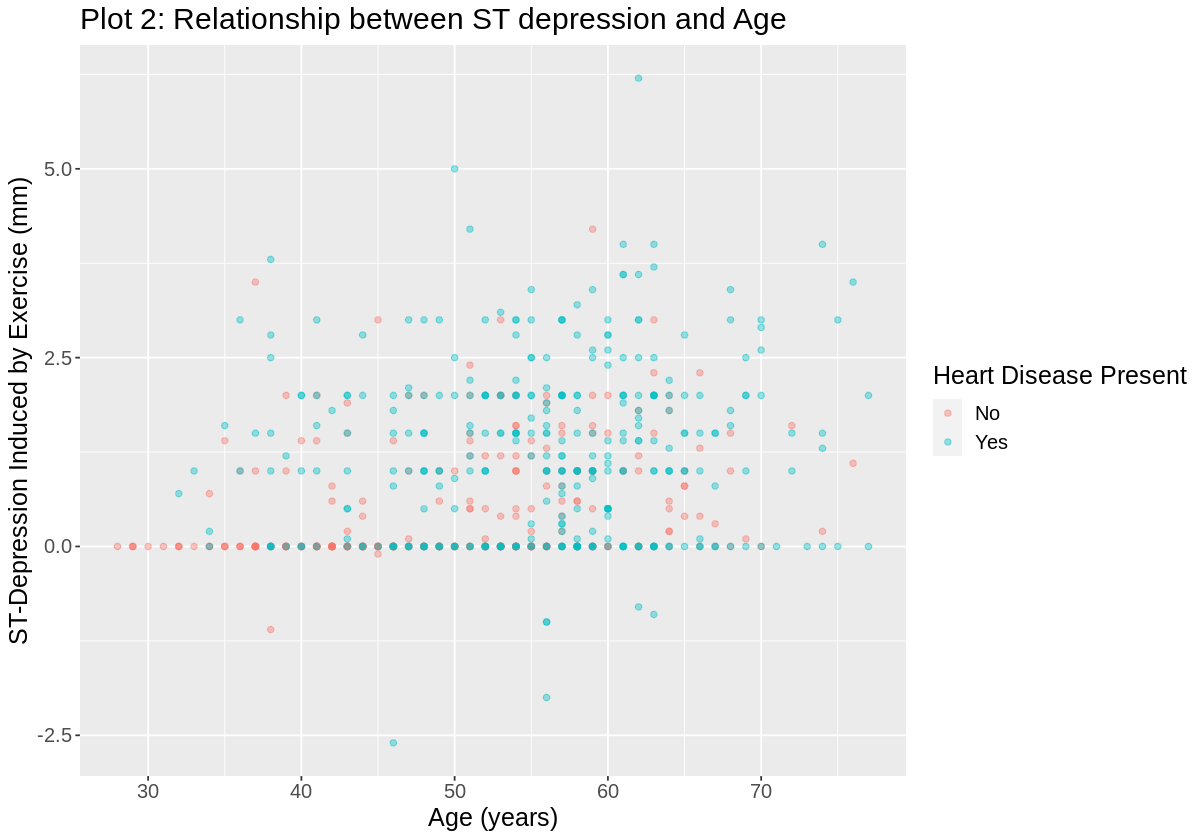

In [8]:
distribution_plot2 <- ggplot(places_training, aes(x = age, y = old_peak, colour = heart_disease_present)) +
    geom_point(alpha = 0.4) +
    xlab("Age (years)") +
    ylab("ST-Depression Induced by Exercise (mm)") +
    labs(colour = "Heart Disease Present") +
    ggtitle('Plot 2: Relationship between ST depression and Age')+
    theme(text = element_text(size = 15))

distribution_plot2

>Plot 2: This plot visualizes the relationship between ST depression (mm) and age (years) using a scatter-plot format while the points are colored by presence of heart disease.

Warning message:
“Removed 143 rows containing missing values (geom_point).”


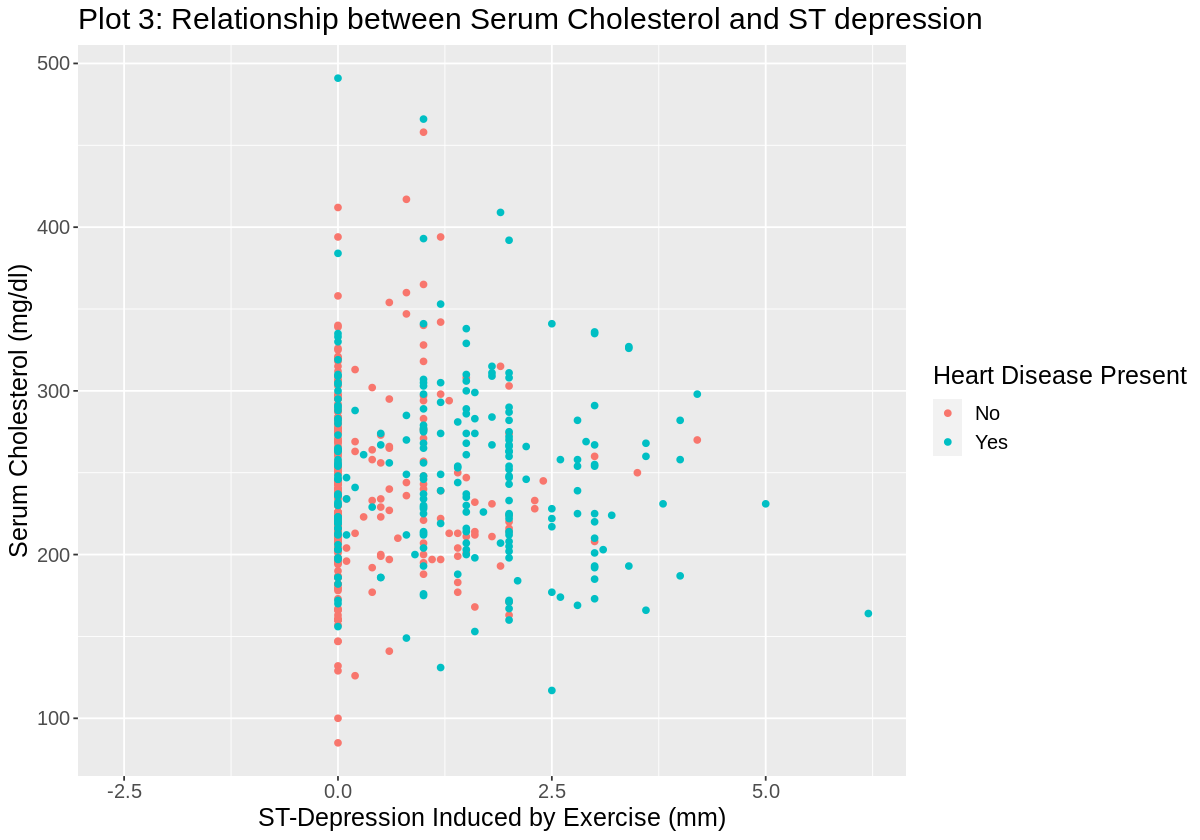

In [9]:
distribution_plot3 <- ggplot(places_training, aes(x = old_peak, y = serum_cholesterol, colour = heart_disease_present)) +
    geom_point() +
    xlab("ST-Depression Induced by Exercise (mm)") +
    ylab("Serum Cholesterol (mg/dl)") +
    labs(colour = "Heart Disease Present") +
    ggtitle('Plot 3: Relationship between Serum Cholesterol and ST depression')+
    theme(text = element_text(size = 15))

distribution_plot3

>Plot 3: This plot visualizes the relationship between ST depression (mm) and serum cholesterol (mg/dl) using a scatter-plot format while the points are colored by presence of heart disease.

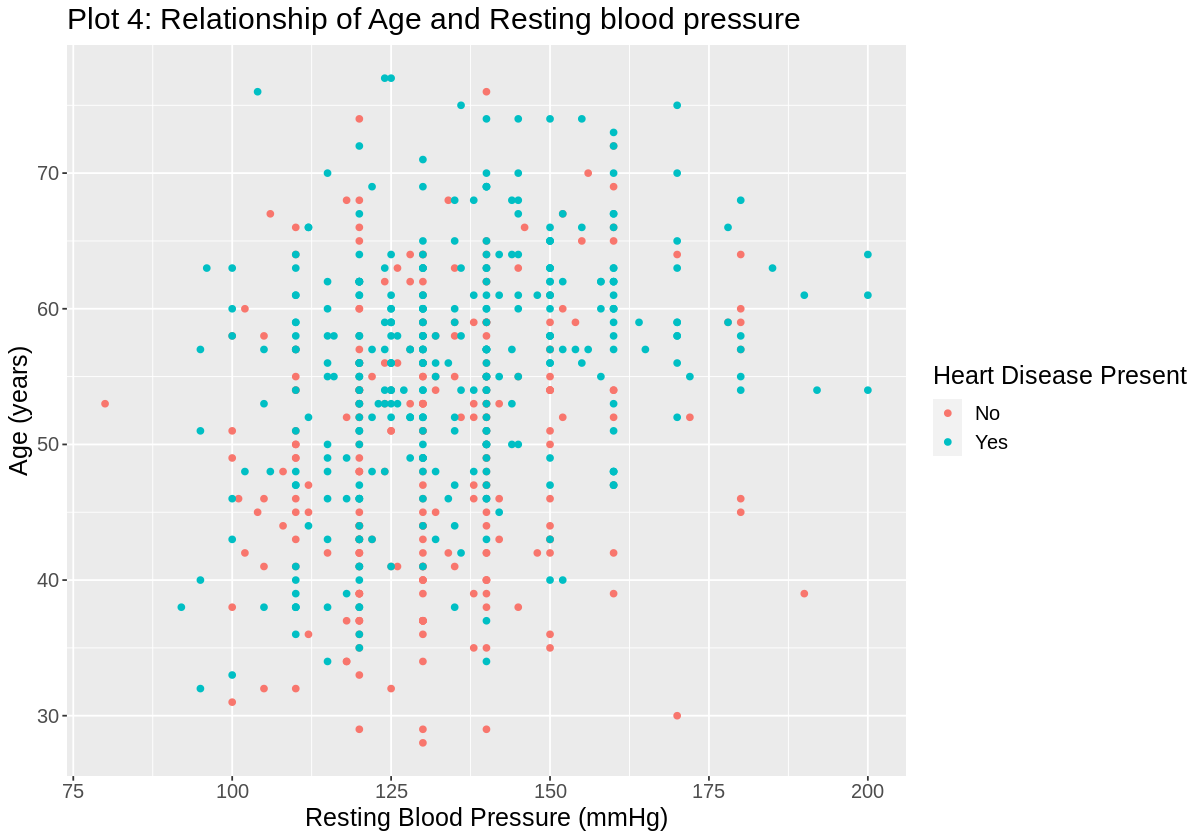

In [10]:
distribution_plot4 <- ggplot(places_training, aes(x = resting_blood_pressure, y = age, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Age (years)") +
    labs(colour = "Heart Disease Present") +
     ggtitle('Plot 4: Relationship of Age and Resting blood pressure')+
    theme(text = element_text(size = 15))

distribution_plot4

>Plot 4: This visualizes the relationship between resting blood pressure (mmHg) and age (years) using a scatter-plot format while the points are colored by presence of heart disease.

To start the prediction model, within the recipe (for preprocessing the data), we chose the final predictors age, ST depression, and maximum heart rate, and our target variable is the presence of heart disease. Our model is also scaled using the step_scale and step_center functions in order to ensure that our variables are able to be evaluated via equalized units.

In [11]:
heart_recipe <- recipe(heart_disease_present ~ max_heart_rate + old_peak + age, data = places_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

Using our nearest_neighbor function in our knn_spec, we use the tune function (for k from 1 to 50) to work in tandem with our vfold_cv function which further splits our dataset into other testing and training data pairs to increase our accuracy. In this case, we chose 5 different fold possibilities to split our data into. Tune’s role is to find our ‘best’ k-value from our data folds and fit our model to it. The nearest_neighbor function finds the k-number of neighbours closest to our observation using this straight line distance formula: 
$Distance = (Ax - Bx)^2 +(Ay - By)^2$

In [12]:
ks <- tibble(neighbors = 1:50)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 
#knn_spec

In [13]:
set.seed(778)
heart_vfold <- vfold_cv(places_training, v = 5, strata = heart_disease_present)

Using the workflow function, we then process, train, and finally fit our training data using our knn_spec model and formulated recipe, as well as the tune_grid to integrate our tune and v-fold values. We can run the collect_metrics function on this dataset in order to attain our accuracy.

In [14]:
set.seed(777)
heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = ks)


We ran the collect_metrics function on this dataset in order to attain our accuracy (Table 3). We then made Plot 5 by using ggplot to plot our number of neighbours to our accuracy estimate using a scatter and line plot visualization.  

[1] "Table 3: Acuuracy list for predivtive model using training set"


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6494510,5,0.02562414,Preprocessor1_Model01
2,accuracy,binary,0.6541633,5,0.02917070,Preprocessor1_Model02
3,accuracy,binary,0.6714008,5,0.03597063,Preprocessor1_Model03
4,accuracy,binary,0.6698260,5,0.03480268,Preprocessor1_Model04
5,accuracy,binary,0.6932026,5,0.02499397,Preprocessor1_Model05
6,accuracy,binary,0.6947774,5,0.02601060,Preprocessor1_Model06


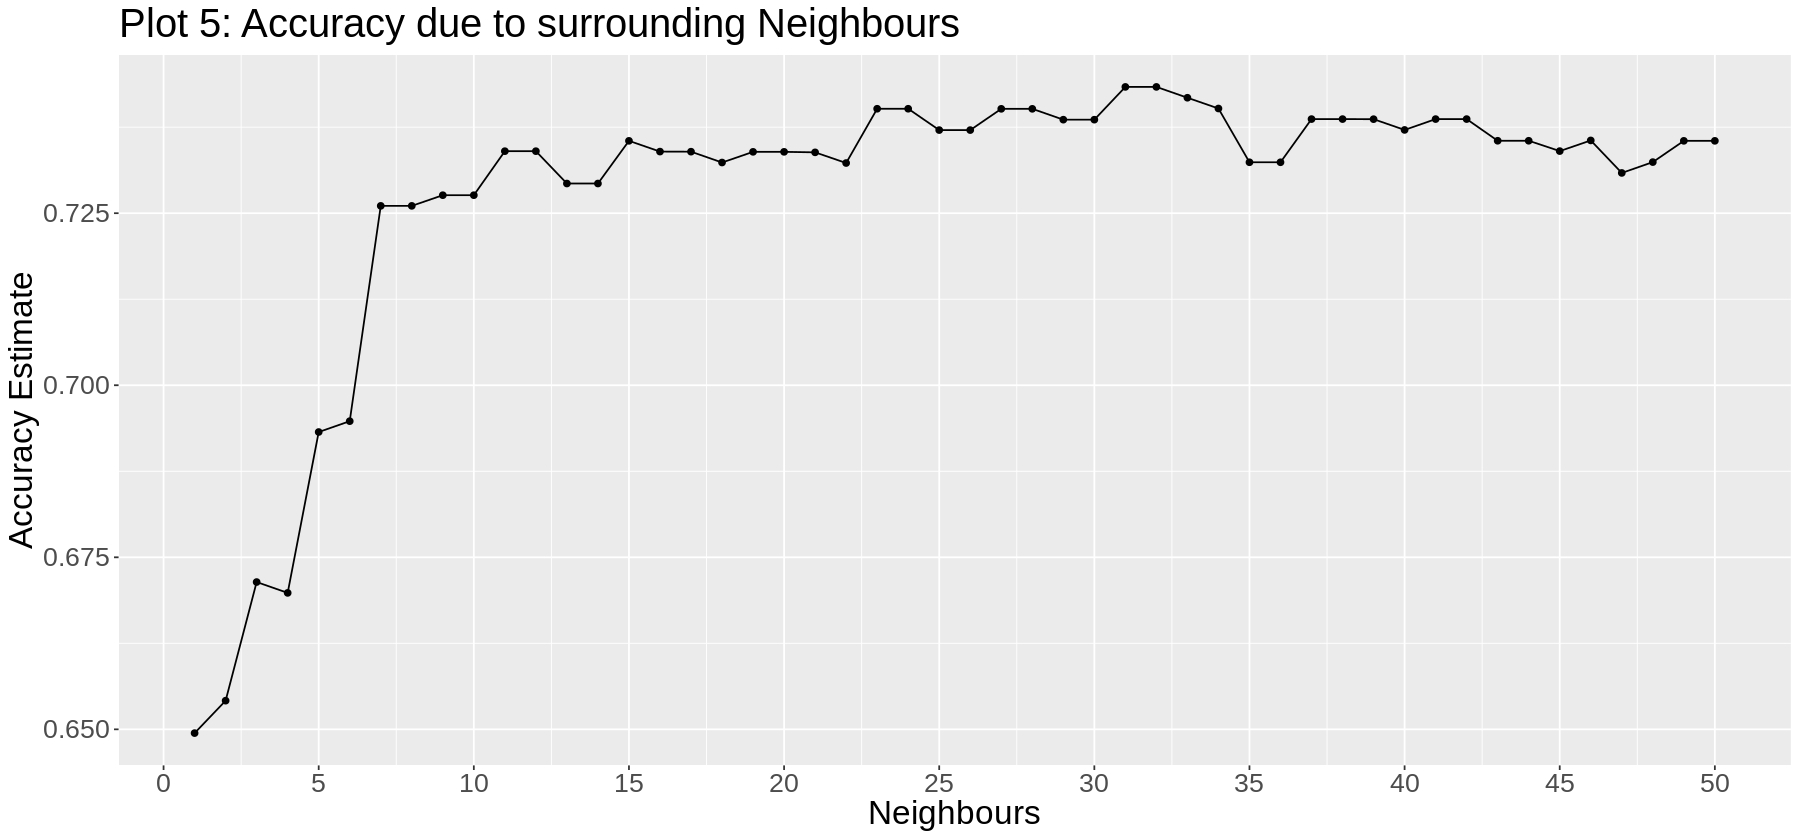

In [15]:
accuracy <- collect_metrics(heart_fit) |>
    filter(.metric == "accuracy")
print('Table 3: Acuuracy list for predivtive model using training set')
head(accuracy)

options(repr.plot.width = 15, repr.plot.height = 7)
ideal_k <- accuracy |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() + 
    labs(x = "Neighbours", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = seq(0, 50, by = 5)) +
    ggtitle("Plot 5: Accuracy due to surrounding Neighbours")
   
ideal_k

> Plot 5: Number of neighbours vs. accuracy estimate in the training data set using a scatter and line ggplot visualization. 

We repeated our nearest_neighbor and workflow function processes using our newfound ‘best’ k-value in order to use our predict function to finally make predictions on our testing data. We then took the metrics of our new dataset to test its accuracy (Table 4). We then created a confusion matrix to take the metrics of our predictions to visualize how many of our training data produced true and accurate results (Table 5)

In [16]:
set.seed(777)
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 31) |>
    set_engine("kknn") |>
    set_mode("classification") 
best_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(best_spec) |>
    fit(data = places_training)

In [17]:
heart_predictions <- predict(best_fit, places_testing) |>
    bind_cols(places_testing)

heart_metrics <- heart_predictions |>
    metrics(truth = heart_disease_present, estimate = .pred_class)

heart_conf_mat <- heart_predictions |>
    conf_mat(truth = heart_disease_present, estimate = .pred_class)

print('Table 4: Acurracy of final model on testing data set')
heart_metrics
print('Table 5: Confusion matrix for predictive model on testing data set')
heart_conf_mat

[1] "Table 4: Acurracy of final model on testing data set"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.728972
kap,binary,0.451476


[1] "Table 5: Confusion matrix for predictive model on testing data set"


          Truth
Prediction No Yes
       No  66  26
       Yes 32  90


Results:

Based on our k-nearest-neighbours classification prediction model that was trained on a subset of the original data, using the predictor variables age, maximum heart rate, and ST wave depression, we plotted the neighbours versus accuracy estimate and found that the best k-value with the highest accuracy of 74.3% is $k= 31$ and $k = 32$. Between those two options, we chose $k=31$ as it is an odd number and used our model on the testing subset and found out that the highest accuracy achieved with the model is about 72.8%. This was further confirmed based on the confusion matrix that our model predicted the presence or absence of heart disease accurately in 156 out of 214 data points.


Discussion:

Based on previous research about the factors that are more prevalent in heart disease,at the start of the project we chose the continuous variables age, serum cholesterol levels, resting blood pressure, ST wave depression, and maximum heart rate in patients in 4 countries, Cleveland and Switzerland, Long Beach, and Hungary to try to create a prediction model to predict the presence or absence of heart disease.

An important part of our analysis was making sense of the data by making the data reproducible (i.e. use set.seed) and changing the data set to a human-readable format (explained in methods). Also, to see the prevalence of the variables that we chose to heart disease and find out if they can actually help our prediction model, we used scatter plots to visualize the relationships of each variable to each other and see how related they are in our data set to the presence of heart disease.

Qiu et al. reported that “[a]ttenuated HRR (after exercise) is associated with increased risk of cardiovascular events” (3). Also, according to Centers for Disease Control and Prevention, “[t]he higher your blood pressure levels, the more risk you have for [ ] heart disease, heart attack, and stroke”(4). Thus we plotted max heart rate vs. resting blood pressure in our data set (Plot 1). It seems that the lower the maximum heart rate after the exercise test, the more individuals were diagnosed with heart disease. However, unexpectedly, the resting blood pressure seemed to have little to no relation with the presence of heart disease. So, we decided to not use resting blood pressure as a predictor in our model.

Moreover, according to MediLexicon International, “ST segment depression typically indicates that a person has an underlying condition that affects the heart” (5). Based on this, we plotted (Plot 2) ST depression vs. age (as an apparent risk factor for heart disease) and saw that the higher the ST depression, the more chance of of heart disease which can become more significant in older individuals.

To make sure that the trend in Plot 2 is correct, we also plotted ST-depression vs. Serum cholesterol (Plot 3) which is known to be an indicator of heart disease according to Jousilahti et al. (6). Although serum cholesterol unexpectedly seemed not to have a relationship with the presence of heart disease (and this might be because we only had data for total serum cholesterol and not HDL), we could confirm that increased ST depression has a relationship with heart disease being present. So, we also used ST depression as a predictor in our model and eliminated serum cholesterol as a variable. Lastly, figure 4 helped to confirm the effect of age on the presence of heart disease as it showed a visible trend in more heart disease in older patients. 

For our final predictive model, based on the above scatter plots, we chose age, maximum heart rate and ST depression as predictors to target the variable ‘heart disease’. After standardizing our data so that the data points have a standard deviation of 1 and an average of 0, by using the k-nearest-neighbours classification model by tuning $k$ to have the values 1 to 50, and by cross-validation with $v=5$, we evaluated the accuracy of our model on the training data set. By visualizing their accuracy with a line graph of Accuracy estimate vs. Neighbors (Plot 5), we found that the highest accuracy achieved is with $k=31$. We further confirmed this on our testing data set by using the prediction model and gaining an accuracy of 72.8%. 

Overall, although our predictive model does not return a very high accuracy estimate by using the predictor variables for the presence of heart disease, it returns an acceptable result given that we only used three predictor variables in the predictive model. An unexpected finding in this project about variables like serum cholesterol levels and resting blood pressure was that their relationship to the presence of heart disease was against what has been found in other proven research studies. However, as this data set does not provide further information about what drugs the patients have been using or if they have any other underlying diseases that might increase the risk of heart disease, this unexpected correlation might be justified.

To sum up with, such predictive computerized models that are trained with pre-existing data can help in further determining how these factors influence heart disease. This information can subsequently be used to guide pharmaceutical development for the prevention of heart diseases and also provide public health education in diet and exercise for preventive measures. Our project can lead to questions like: How can a prediction model be optimized based on the significance of each variable on heart disease? Do we get better results if we factor in variables like geographic location, sex, and other variables not used in this model?



References:

1- Wannamethee, G., & Shaper, A. G. (1994). The association between heart rate and blood pressure, blood lipids and other cardiovascular risk factors. European Journal of Cardiovascular Prevention &amp; Rehabilitation, 1(3), 223–230. https://doi.org/10.1177/174182679400100307 

2- Heart Disease [data file]. DOI: 10.24432/C52P4X. Donated on 6/30/1988. Accessed on June 2023 through: https://archive.ics.uci.edu/dataset/45/heart+disease 

3- Qiu, S., Cai, X., Sun, Z., Li, L., Zuegel, M., Steinacker, J. M., & Schumann, U. (2017). Heart rate recovery and risk of cardiovascular events and all‐cause mortality: A meta‐analysis of prospective cohort studies. Journal of the American Heart Association, 6(5). https://doi.org/10.1161/jaha.117.005505 

4- Centers for Disease Control and Prevention. (2021, May 18). High blood pressure symptoms and causes. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/about.htm 

5- MediLexicon International. (n.d.). St segment depression: Definition, causes, treatments. Medical News Today. https://www.medicalnewstoday.com/articles/st-segment-depression  

6- Jousilahti, P., Vartiainen, E., Pekkanen, J., Tuomilehto, J., Sundvall, J., & Puska, P. (1998). Serum cholesterol distribution and Coronary Heart Disease Risk. Circulation, 97(11), 1087–1094. https://doi.org/10.1161/01.cir.97.11.1087
